
This is a re-implementation of some Pythona and R code based off the article, https://shiring.github.io/r_vs_python/2017/01/22/R_vs_Py_post which was based off of https://www.toptal.com/python/comprehensive-introduction-your-genome-scipy


In [7]:
# !wget ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz

/bin/sh: wget: command not found


In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(dplyr)
library(ggplot2)



Error in library(ggplot2) : there is no package called ‘ggplot2’


In [8]:
%%timeit -n 1 -r 1
global df
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
df = pd.read_csv('Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip',
                         sep='\t', comment='#', low_memory=False,
                         header=None, names=col_names)

9.64 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
%%timeit -n 1 -r 1
%%R
df <- read.csv("Homo_sapiens.GRCh38.85.gff3.gz", 
               header = FALSE, 
               sep = "\t", 
               col.names = c('seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'), 
               comment.char = "#")
head(df)

  seqid source              type start       end   score strand phase
1     1 GRCh38        chromosome     1 248956422       .      .     .
2     1      . biological_region 10469     11240 1.3e+03      .     .
3     1      . biological_region 10650     10657   0.999      +     .
4     1      . biological_region 10655     10657   0.999      -     .
5     1      . biological_region 10678     10687   0.999      +     .
6     1      . biological_region 10681     10688   0.999      -     .
                                          attributes
1 ID=chromosome:1;Alias=CM000663.2,chr1,NC_000001.11
2           external_name=oe %3D 0.79;logic_name=cpg
3                                 logic_name=eponine
4                                 logic_name=eponine
5                                 logic_name=eponine
6                                 logic_name=eponine


1min 34s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
%%timeit -n 1 -r 1
print(df.seqid.unique())

['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '3' '4' '5' '6' '7' '8' '9' 'GL000008.2' 'GL000009.2' 'GL000194.1'
 'GL000195.1' 'GL000205.2' 'GL000208.1' 'GL000213.1' 'GL000214.1'
 'GL000216.2' 'GL000218.1' 'GL000219.1' 'GL000220.1' 'GL000221.1'
 'GL000224.1' 'GL000225.1' 'GL000226.1' 'KI270302.1' 'KI270303.1'
 'KI270304.1' 'KI270305.1' 'KI270310.1' 'KI270311.1' 'KI270312.1'
 'KI270315.1' 'KI270316.1' 'KI270317.1' 'KI270320.1' 'KI270322.1'
 'KI270329.1' 'KI270330.1' 'KI270333.1' 'KI270334.1' 'KI270335.1'
 'KI270336.1' 'KI270337.1' 'KI270338.1' 'KI270340.1' 'KI270362.1'
 'KI270363.1' 'KI270364.1' 'KI270366.1' 'KI270371.1' 'KI270372.1'
 'KI270373.1' 'KI270374.1' 'KI270375.1' 'KI270376.1' 'KI270378.1'
 'KI270379.1' 'KI270381.1' 'KI270382.1' 'KI270383.1' 'KI270384.1'
 'KI270385.1' 'KI270386.1' 'KI270387.1' 'KI270388.1' 'KI270389.1'
 'KI270390.1' 'KI270391.1' 'KI270392.1' 'KI270393.1' 'KI270394.1'
 'KI270395.1' 'KI270396.1' 'KI270411.1' 'KI270412.1' 'KI270414.1'


In [11]:
%%timeit -n 1 -r 1
%%R
unique(df$seqid)

  [1] 1          10         11         12         13         14        
  [7] 15         16         17         18         19         2         
 [13] 20         21         22         3          4          5         
 [19] 6          7          8          9          GL000008.2 GL000009.2
 [25] GL000194.1 GL000195.1 GL000205.2 GL000208.1 GL000213.1 GL000214.1
 [31] GL000216.2 GL000218.1 GL000219.1 GL000220.1 GL000221.1 GL000224.1
 [37] GL000225.1 GL000226.1 KI270302.1 KI270303.1 KI270304.1 KI270305.1
 [43] KI270310.1 KI270311.1 KI270312.1 KI270315.1 KI270316.1 KI270317.1
 [49] KI270320.1 KI270322.1 KI270329.1 KI270330.1 KI270333.1 KI270334.1
 [55] KI270335.1 KI270336.1 KI270337.1 KI270338.1 KI270340.1 KI270362.1
 [61] KI270363.1 KI270364.1 KI270366.1 KI270371.1 KI270372.1 KI270373.1
 [67] KI270374.1 KI270375.1 KI270376.1 KI270378.1 KI270379.1 KI270381.1
 [73] KI270382.1 KI270383.1 KI270384.1 KI270385.1 KI270386.1 KI270387.1
 [79] KI270388.1 KI270389.1 KI270390.1 KI270391.1 KI270392.1 KI2

76 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
%%timeit -n 1 -r 1
df.seqid.unique().shape

69.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [13]:
%%timeit -n 1 -r 1
%%R
length(unique(df$seqid))

[1] 194


69.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
%%timeit -n 1 -r 1
df.source.value_counts()

334 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
%%timeit -n 1 -r 1
%%R
sort(table(df$source), decreasing = TRUE)


        havana ensembl_havana        ensembl              .        mirbase 
       1441093         745065         228212         182510           4701 
        GRCh38          insdc 
           194             74 


484 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
%%timeit -n 1 -r 1
global gdf
gdf = df[df.source == 'GRCh38']
gdf.shape
print(gdf.sample(10))

              seqid  source         type  start     end score strand phase  \
2511568  KI270579.1  GRCh38  supercontig      1   31033     .      .     .   
2513683  KI270736.1  GRCh38  supercontig      1  181920     .      .     .   
2510977  GL000220.1  GRCh38  supercontig      1  161802     .      .     .   
2511578  KI270591.1  GRCh38  supercontig      1    5796     .      .     .   
2511559  KI270522.1  GRCh38  supercontig      1    5674     .      .     .   
2513045  KI270730.1  GRCh38  supercontig      1  112551     .      .     .   
2511509  KI270420.1  GRCh38  supercontig      1    2321     .      .     .   
2513720  KI270743.1  GRCh38  supercontig      1  210658     .      .     .   
2512199  KI270717.1  GRCh38  supercontig      1   40062     .      .     .   
2511459  KI270311.1  GRCh38  supercontig      1   12399     .      .     .   

                                                attributes  
2511568  ID=supercontig:KI270579.1;Alias=chrUn_KI270579...  
2513683  ID=superco

In [17]:
%%timeit -n 1 -r 1
%%R
gdf <- df[df$source == "GRCh38", ]
dim(gdf)
sample_n(gdf, 10)

             seqid source        type   start      end score strand phase
2511546 KI270467.1 GRCh38 supercontig       1     3920     .      .     .
2594561          Y GRCh38  chromosome 2781480 56887902     .      .     .
2513975 KI270754.1 GRCh38 supercontig       1    40191     .      .     .
2510913 GL000214.1 GRCh38 supercontig       1   137718     .      .     .
2511563 KI270530.1 GRCh38 supercontig       1     2168     .      .     .
2512199 KI270716.1 GRCh38 supercontig       1   153799     .      .     .
2511635 KI270710.1 GRCh38 supercontig       1    40176     .      .     .
2511489 KI270382.1 GRCh38 supercontig       1     4215     .      .     .
2513729 KI270744.1 GRCh38 supercontig       1   168472     .      .     .
2511580 KI270593.1 GRCh38 supercontig       1     3041     .      .     .
                                                                attributes
2511546       ID=supercontig:KI270467.1;Alias=chrUn_KI270467v1,NT_187423.1
2594561                 ID=chromosom

1.03 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [18]:
%%timeit -n 1 -r 1
global gdf
gdf = gdf.copy()
gdf['length'] = gdf.end - gdf.start + 1

print(gdf.length.sum())

3096629726
258 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [19]:
%%R
#  %%timeit -n 1 -r 1  gives an error due to $
gdf$length <- gdf$end - gdf$start + 1
sum(gdf$length)

[1] 3096629726


In [20]:
%%timeit -n 1 -r 1
print(gdf[(gdf['type'] == 'supercontig')].length.sum() / gdf.length.sum())

0.0037021917421198327
3.89 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:

%%R
chrs <- c(1:23, "X", "Y", "MT")
sum(subset(gdf, !seqid %in% chrs)$length) / sum(gdf$length)

[1] 0.003702192


In [22]:
%%timeit -n 1 -r 1
global edf
edf = df[df.source.isin(['ensembl', 'havana', 'ensembl_havana'])]
edf.shape

edf.sample(10)
print(edf.type.value_counts())

exon                             1180596
CDS                               704604
five_prime_UTR                    142387
three_prime_UTR                   133938
transcript                         96375
gene                               42470
processed_transcript               28228
aberrant_processed_transcript      26944
NMD_transcript_variant             13761
lincRNA                            13247
processed_pseudogene               10722
lincRNA_gene                        7533
pseudogene                          3049
RNA                                 2221
snRNA_gene                          1909
snRNA                               1909
snoRNA                               956
snoRNA_gene                          944
pseudogenic_transcript               737
rRNA                                 549
rRNA_gene                            549
miRNA                                302
V_gene_segment                       216
J_gene_segment                       158
VD_gene_segment 

In [23]:
%%timeit -n 1 -r 1
%%R
edf <- subset(df, source %in% c("ensembl", "havana", "ensembl_havana"))
dim(edf)
sample_n(edf, 10)

        seqid         source            type     start       end score strand
1261964    19        ensembl            exon  17172759  17172963     .      +
356471     11 ensembl_havana            exon  14517642  14517745     .      -
1363595    19         havana            exon  58416811  58417119     .      +
633479     12         havana three_prime_UTR 132843011 132843083     .      -
2132622     6         havana      transcript  46903471  46909078     .      +
2505045     9         havana            exon 136955371 136955497     .      +
2045475     5 ensembl_havana             CDS 141659408 141659476     .      -
1357003    19 ensembl_havana            exon  55499816  55500412     .      +
317898     10 ensembl_havana            exon 119932133 119932318     .      +
143325      1         havana            exon 150965173 150966288     .      -
        phase
1261964     .
356471      .
1363595     .
633479      .
2132622     .
2505045     .
2045475     0
1357003     .
317898      .
14

1.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
%%timeit -n 1 -r 1
global ndf
ndf = edf[edf.type == 'gene']
ndf = ndf.copy()
ndf.sample(10).attributes.values
print(ndf.shape)

(42470, 9)
210 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%timeit -n 1 -r 1
%%R
ndf <- subset(edf, type == "gene")
sample_n(ndf, 10)$attributes

 [1] ID=gene:ENSG00000172037;Name=LAMB2;biotype=protein_coding;description=laminin subunit beta 2 [Source:HGNC Symbol%3BAcc:HGNC:6487];gene_id=ENSG00000172037;havana_gene=OTTHUMG00000156807;havana_version=4;logic_name=ensembl_havana_gene;version=13                           
 [2] ID=gene:ENSG00000257864;Name=RP11-46I1.2;biotype=processed_pseudogene;gene_id=ENSG00000257864;havana_gene=OTTHUMG00000169430;havana_version=1;logic_name=havana;version=1                                                                                                     
 [3] ID=gene:ENSG00000165097;Name=KDM1B;biotype=protein_coding;description=lysine demethylase 1B [Source:HGNC Symbol%3BAcc:HGNC:21577];gene_id=ENSG00000165097;havana_gene=OTTHUMG00000014316;havana_version=4;logic_name=ensembl_havana_gene;version=13                           
 [4] ID=gene:ENSG00000164778;Name=EN2;biotype=protein_coding;description=engrailed homeobox 2 [Source:HGNC Symbol%3BAcc:HGNC:3343];gene_id=ENSG00000164778;havana_gene=OTTHU

3min 39s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
%%timeit -n 1 -r 1
import re

RE_GENE_NAME = re.compile(r'Name=(?P<gene_name>.+?);')
def extract_gene_name(attributes_str):
    res = RE_GENE_NAME.search(attributes_str)
    return res.group('gene_name')


ndf['gene_name'] = ndf.attributes.apply(extract_gene_name)

RE_GENE_ID = re.compile(r'gene_id=(?P<gene_id>ENSG.+?);')
def extract_gene_id(attributes_str):
    res = RE_GENE_ID.search(attributes_str)
    return res.group('gene_id')


ndf['gene_id'] = ndf.attributes.apply(extract_gene_id)


RE_DESC = re.compile('description=(?P<desc>.+?);')
def extract_description(attributes_str):
    res = RE_DESC.search(attributes_str)
    if res is None:
        return ''
    else:
        return res.group('desc')


ndf['desc'] = ndf.attributes.apply(extract_description)

ndf.drop('attributes', axis=1, inplace=True)
ndf.head()

198 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%R
ptm <- proc.time()
ndf$gene_name <- gsub("(.*Name=)(.*?)(;biotype.*)", "\\2", ndf$attributes)
ndf$gene_id <- gsub("(ID=gene:)(.*?)(;Name.*)", "\\2", ndf$attributes)
ndf$desc <- gsub("(.*description=)(.*?)(;.*)", "\\2", ndf$attributes)

# some genes don't have a description
ndf$desc <- ifelse(grepl("^ID=.*", ndf$desc), "", ndf$desc)

ndf <- subset(ndf, select = -attributes)
print(proc.time() - ptm)
head(ndf)

   user  system elapsed 
  1.307   0.017   1.322 
    seqid         source type  start    end score strand phase gene_name
17      1         havana gene  11869  14409     .      +     .   DDX11L1
29      1         havana gene  14404  29570     .      -     .    WASH7P
72      1         havana gene  52473  53312     .      +     .    OR4G4P
75      1         havana gene  62948  63887     .      +     .   OR4G11P
78      1 ensembl_havana gene  69091  70008     .      +     .     OR4F5
109     1         havana gene 131025 134836     .      +     .    CICP27
            gene_id
17  ENSG00000223972
29  ENSG00000227232
72  ENSG00000268020
75  ENSG00000240361
78  ENSG00000186092
109 ENSG00000233750
                                                                                                  desc
17                                 DEAD/H-box helicase 11 like 1 [Source:HGNC Symbol%3BAcc:HGNC:37102]
29                       WAS protein family homolog 7 pseudogene [Source:HGNC Symbol%3BAcc:HG

Jump to plotting


In [26]:
ndf['length'] = ndf.end - ndf.start + 1
ndf.length.describe()

count    4.247000e+04
mean     3.583348e+04
std      9.683485e+04
min      8.000000e+00
25%      8.840000e+02
50%      5.170500e+03
75%      3.055200e+04
max      2.304997e+06
Name: length, dtype: float64

In [27]:
%%R
ndf$length <- ndf$end - ndf$start + 1
summary(ndf$length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      8     884    5170   35834   30552 2304997 


255 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


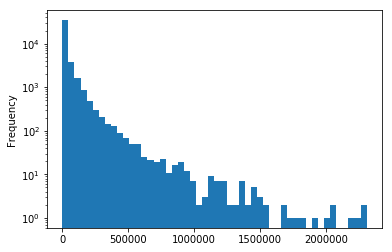

In [28]:
%%timeit -n 1 -r 1
ndf.length.plot(kind='hist', bins=50, logy=True)

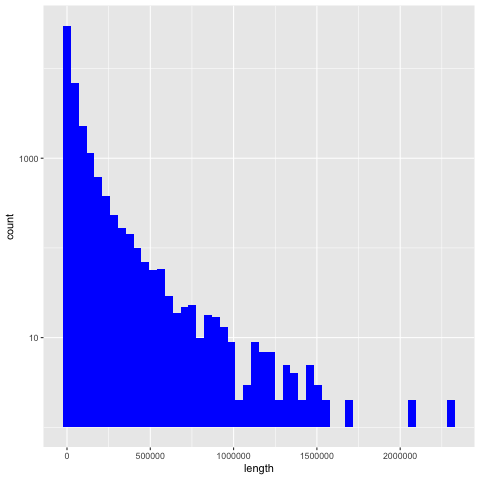

1.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [29]:
%%timeit -n 1 -r 1
%%R
ndf %>% ggplot(aes(x = length)) + 
  geom_histogram(bins = 50, fill = "blue") + 
  scale_y_log10()